In [44]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#Data loader lib
import mnist_reader

#Load data
X_train, y_train = mnist_reader.load_mnist('fashion-data/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('fashion-data/data/fashion', kind='t10k')

#Change shape of data holding image from (784) to (28, 28)
X_train = np.reshape(X_train, (60000, 28, 28))
X_test = np.reshape(X_test, (10000, 28, 28))

#Normalize the data
X_train = X_train/255.0
X_test = X_test/255.0

#Class label
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [48]:
#Basic MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)), #Flatten the data shape into array of 1 dimension
    Dense(128),                    #Dense layer with 128 nodes/neurons
    Activation("relu"),            #Activation layer set to relu
    BatchNormalization(),          #BatchNormalization for Normalization of data between layers
    Dropout(0.2),                  #Dropout layer with 20% rate
    Dense(10)                      #Output layer
])
#Standard compiler
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer="adam",
            metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.7021 - accuracy: 0.7514 - val_loss: 0.4621 - val_accuracy: 0.8308
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5281 - accuracy: 0.8149 - val_loss: 0.4938 - val_accuracy: 0.8264
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5014 - accuracy: 0.8241 - val_loss: 0.4279 - val_accuracy: 0.8453
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.4731 - accuracy: 0.8307 - val_loss: 0.4107 - val_accuracy: 0.8488
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4626 - accuracy: 0.8380 - val_loss: 0.4158 - val_accuracy: 0.8527
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4531 - accuracy: 0.8401 - val_loss: 0.4059 - val_accuracy: 0.8551
Epoch 7/10
60000/60000 [==============================] 

In [49]:
#LOADING TESTING DATA FOR THE TRAINED MODEL

import os
import cv2
from tqdm import tqdm

testing_data = []

for img in os.listdir("T-shirt/"):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join("T-shirt/",img) ,cv2.IMREAD_GRAYSCALE)
        img_array = 255 - img_array
        testing_data.append([img_array, 0])
        
for img in os.listdir("Trouser/"):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join("Trouser/",img) ,cv2.IMREAD_GRAYSCALE)
        img_array = 255 - img_array
        testing_data.append([img_array, 1])
        
for img in os.listdir("Pullover/"):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join("Pullover/",img) ,cv2.IMREAD_GRAYSCALE)
        img_array = 255 - img_array
        testing_data.append([img_array, 2])
        
for img in os.listdir("Dress/"):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join("Dress/",img) ,cv2.IMREAD_GRAYSCALE)
        img_array = 255 - img_array
        testing_data.append([img_array, 3])

In [22]:
#Separate Image data set and Label data set
X_test_data = []
y_test_data = []
for test_data in testing_data:
    X_test_data.append(test_data[0])
    y_test_data.append(test_data[1])

In [23]:
y_test_data #Label data set

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]

In [24]:
X_test_data #Image data set

[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  18,  45,
          49,  49,  45,  18,  10,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  30,  47,  97, 102, 253,
         255, 255, 253, 103,  97,  47,  30,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,  50, 133, 197, 130, 142,  92, 144,
         255, 255, 144,  92, 140, 131, 197, 133,  50,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,  92, 219, 255, 255, 180,  96, 177, 105,
          73,  73, 105, 178,  95, 181, 255, 255, 219,  91,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,  11, 213, 255, 255, 255, 254, 135,  72, 162,
         211, 210, 161,  70, 137, 255, 255, 255, 255, 213,  11,   0,   0,
           0

In [25]:
#Convert the logits to probabilities for easier interpretation
probability_model = Sequential([model, tf.keras.layers.Softmax()]) 

In [29]:
#Convert testing Image data set from linked list to array to insert into the model
X_test_data = np.array(X_test_data)
X_test_data.shape

(16, 28, 28)

In [30]:
predictions = probability_model.predict(X_test_data)

In [36]:
#Fetching the maximum probabilities to display the result
result = []
for pred in predictions:
    result.append(np.argmax(pred))
result

[0, 0, 4, 0, 1, 1, 1, 1, 4, 9, 9, 0, 3, 8, 0, 4]

In [37]:
#Drawing methods
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

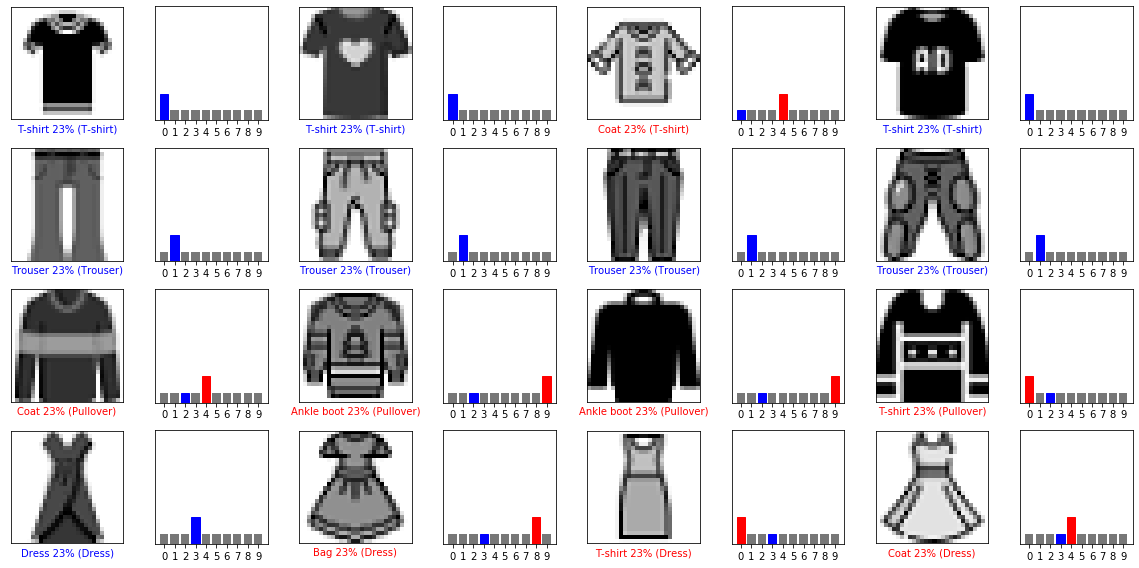

In [38]:
#Drawing results with blue is the true result and red is predicted result
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test_data, X_test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test_data)
plt.tight_layout()
plt.show()